<h3> Data Preprocessing</h3>

In [32]:
!head online_shoppers_intention.csv

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64,0,0.1,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0,0.2,0.2,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666666667,0.05,0.14,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.5,0.02,0.05,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.2166667,0.015789474,0.024561404,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0,0.2,0.2,0,0.4,Feb,2,4,3,3,Returning_Visitor,FALSE,FALSE
1,0,0,0,0,0,0.2,0.2,0,0,Feb,1,2,1,5,Returning_Visitor,TRUE,FALSE
0,0,0,0,2,37,0,0.1,0,0.8,Feb,2,2,2,3,Returning_Visitor,FALSE,FALSE


In [33]:
import pandas as pd
ds=pd.read_csv('online_shoppers_intention.csv')

In [34]:
ds.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [35]:
feats=ds.drop('Revenue',axis=1)

In [36]:
target=ds['Revenue']

In [37]:
feats.shape, target.shape

((12330, 17), (12330,))

In [38]:
feats.to_csv('osv_project_feats.csv',index=False)
target.to_csv('osv_project_target.csv', index=False, header='Revenue')

In [39]:
feats=pd.read_csv('osv_project_feats.csv')
feats.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [40]:
target=pd.read_csv('osv_project_target.csv')
target.head()

,Revenue
0,False
1,False
2,False
3,False
4,False


False    10422
True      1908
Name: Revenue, dtype: int64


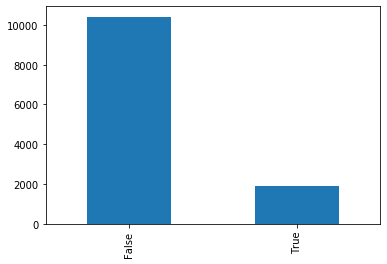

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
print(target['Revenue'].value_counts())
target['Revenue'].value_counts().plot(kind='bar')

As we can see the model has imbalanced dataset

In [42]:
target['Revenue']=target['Revenue'].apply(lambda row: 1 if row==True else 0)
target.head(10)

,Revenue
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [43]:
feats['Weekend']=feats['Weekend'].apply(lambda row: 1 if row == True else 0)
feats['Weekend'].head(10)

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    0
Name: Weekend, dtype: int64

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


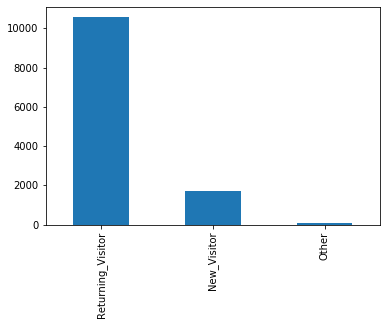

In [44]:
print(feats['VisitorType'].value_counts())
feats['VisitorType'].value_counts().plot(kind='bar')

One hot encoding of multi-category data

In [45]:
colname='VisitorType'
dummies=pd.get_dummies(feats[colname], prefix=colname)
dummies.head()

,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [46]:
dummies.drop('VisitorType_Other',axis=1,inplace=True)
feats.drop('VisitorType',axis=1,inplace=True)
feats=pd.concat([feats,dummies],axis=1)
feats.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,1,0,1


May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


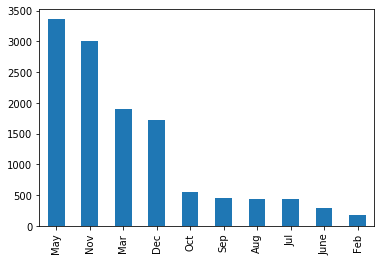

In [47]:
print(feats['Month'].value_counts())
feats['Month'].value_counts().plot(kind='bar')

In [48]:
colname='Month'
dummies=pd.get_dummies(feats[colname],prefix=colname)
feats.drop('Month',axis=1,inplace=True)
feats=pd.concat([feats,dummies],axis=1)
feats.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
feats.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep'],
      dtype='object')

In [51]:
feats.dtypes

Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
Weekend                            int64
VisitorType_New_Visitor            uint8
VisitorType_Returning_Visitor      uint8
Month_Aug                          uint8
Month_Dec                          uint8
Month_Feb                          uint8
Month_Jul                          uint8
Month_June                         uint8
Month_Mar                          uint8
Month_May                          uint8
Month_Nov       

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


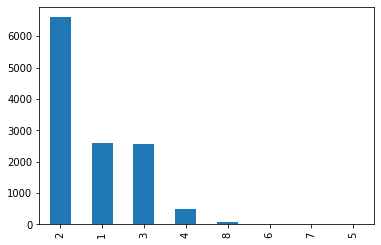

In [52]:
print(feats['OperatingSystems'].value_counts())
feats['OperatingSystems'].value_counts().plot(kind='bar')

In [53]:
colname='OperatingSystems'
dummies=pd.get_dummies(feats[colname],prefix=colname)
dummies.head()

,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8
0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


As we can see the value counts for OS 6,7,5 are very less so we can omit it from the dataset

In [54]:
dummies.drop(['OperatingSystems_6','OperatingSystems_7','OperatingSystems_5'],axis=1,inplace=True)

In [55]:
dummies.head()

,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_8
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,0,1,0,0


In [56]:
feats.drop('OperatingSystems',axis=1,inplace=True)
feats=pd.concat([feats,dummies],axis=1)
feats.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_8
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,...,0,0,0,0,0,0,1,0,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,...,0,0,0,0,0,0,1,0,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,...,0,0,0,0,0,0,1,0,0,0


2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


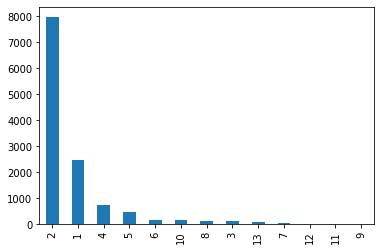

In [57]:
print(feats['Browser'].value_counts())
feats['Browser'].value_counts().plot(kind='bar')

In [59]:
colname='Browser'
dummies=pd.get_dummies(feats[colname],prefix=colname)
dummies.head()

,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0


In [61]:
dummies.drop(['Browser_9'],axis=1,inplace=True)
feats.drop('Browser',axis=1,inplace=True)
feats=pd.concat([feats,dummies],axis=1)
feats.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_10,Browser_11,Browser_12,Browser_13
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64


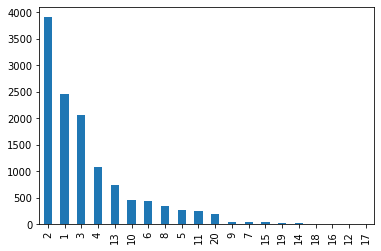

In [63]:
print(feats['TrafficType'].value_counts())
feats['TrafficType'].value_counts().plot(kind='bar')

In [64]:
colname = 'TrafficType' 
traffic_dummies = pd.get_dummies(feats[colname], prefix=colname) # value 17 occurs with lowest frequency 
traffic_dummies.drop(colname+'_17', axis=1, inplace=True) 
feats = pd.concat([feats, traffic_dummies], axis=1)
feats.drop(colname,axis=1,inplace=True)
feats.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64


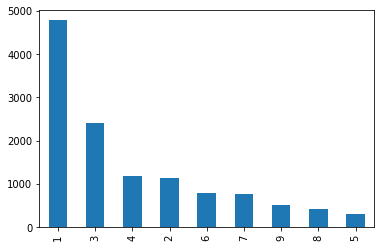

In [65]:
colname = 'Region' 
print(feats[colname].value_counts())
feats[colname].value_counts().plot(kind='bar')

In [67]:
region_dummies = pd.get_dummies(feats[colname], prefix=colname) 
feats = pd.concat([feats, region_dummies], axis=1)
feats.drop(colname,axis=1,inplace=True)
feats.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region_9,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


<h3> Finally save the transformed dataset</h3>

In [69]:
feats.to_csv('osi_project_feats_final.csv',index=False)
target.to_csv('osi_project_target_final.csv',index=False,header='Revenue')

In [70]:
!head osi_project_feats_final.csv

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,VisitorType_New_Visitor,VisitorType_Returning_Visitor,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_10,Browser_11,Browser_12,Browser_13,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9
0,0.0,0,0.0,1,0.0,0.2

In [71]:
!head osi_project_target_final.csv

Revenue
0
0
0
0
0
0
0
0
0
